In [1]:
import sklearn
import pandas as pd
import numpy as np
from numpy import mean
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc
from sklearn.model_selection import cross_val_score
from collections import Counter
#from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline
from time import time
from sklearn.model_selection import GridSearchCV

In [2]:
from xgboost import XGBClassifier

### Importantar o dataset
#### O arquivo precisa está na mesma pasta do notebook

In [3]:
dfs = pd.read_csv('suap_gsa_Filosofia_III.csv', sep=';'  , engine='python')

In [4]:
dfs.shape

(101, 46)

In [5]:
dfs2 = pd.read_csv('suap_gsa_Filosofia_II.csv', sep=';'  , engine='python')

In [6]:
dfs2.shape

(128, 46)

In [7]:
dfs = dfs.append(dfs2, ignore_index = True) 

In [8]:
dados = dfs.copy()

In [9]:
del dados['Codigo Situacao final bimestre']

In [10]:
dados.shape

(229, 45)

In [11]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 45 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Q1 - Nota                                                229 non-null    float64
 1   Q2 - Nota                                                229 non-null    int64  
 2   Q1 - Tempo envio                                         229 non-null    float64
 3   Q2 - Tempo envio                                         229 non-null    float64
 4   S1 - Tempo ultimo acesso                                 229 non-null    float64
 5   S2 - Tempo ultimo acesso                                 229 non-null    float64
 6   Ano de Ingresso                                          229 non-null    float64
 7   ('Nota', 'Biologia I')                                   229 non-null    float64
 8   ('Nota', 'Educacao Fisica I') 

In [12]:
dados.describe()

,Q1 - Nota,Q2 - Nota,Q1 - Tempo envio,Q2 - Tempo envio,S1 - Tempo ultimo acesso,S2 - Tempo ultimo acesso,Ano de Ingresso,"('Nota', 'Biologia I')","('Nota', 'Educacao Fisica I')","('Nota', 'Filosofia I')",...,cota_SISTEC_Necessidades Especiais,cota_MEC_Nao se aplica,cota_MEC_publica,cota_MEC_publica_PCD,cota_MEC_publica_PPI,"cota_MEC_publica_renda_menor_1,5SM","cota_MEC_publica_renda_menor_1,5SM_PCD","cota_MEC_publica_renda_menor_1,5SM_PPI","cota_MEC_publica_renda_menor_1,5SM_PPI_PCD",Escola de Origem
count,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,...,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.0,229.000000
mean,75.292576,79.344978,7.537118,9.812227,22.899563,9.825328,2018.432314,75.831878,88.679039,78.351528,...,0.013100,0.554585,0.043668,0.008734,0.117904,0.074236,0.004367,0.196507,0.0,83.751092
std,23.312277,25.460818,17.356041,22.001687,38.781252,22.838584,0.642777,12.794818,5.877648,10.029004,...,0.113954,0.498100,0.204803,0.093249,0.323201,0.262729,0.066082,0.398226,0.0,56.146066
min,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2016.000000,35.000000,72.500000,38.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,62.500000,80.000000,2.000000,2.000000,3.000000,4.000000,2018.000000,72.000000,85.000000,74.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,20.000000
50%,78.000000,90.000000,4.000000,5.000000,4.000000,5.000000,2018.000000,78.000000,90.000000,78.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,92.000000
75%,92.000000,90.000000,5.000000,5.000000,5.000000,5.000000,2019.000000,85.000000,93.000000,85.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,138.000000
max,100.000000,100.000000,99.000000,99.000000,99.000000,99.000000,2020.000000,99.000000,100.000000,99.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,165.000000


In [13]:
dados.head()

,Q1 - Nota,Q2 - Nota,Q1 - Tempo envio,Q2 - Tempo envio,S1 - Tempo ultimo acesso,S2 - Tempo ultimo acesso,Ano de Ingresso,"('Nota', 'Biologia I')","('Nota', 'Educacao Fisica I')","('Nota', 'Filosofia I')",...,cota_SISTEC_Necessidades Especiais,cota_MEC_Nao se aplica,cota_MEC_publica,cota_MEC_publica_PCD,cota_MEC_publica_PPI,"cota_MEC_publica_renda_menor_1,5SM","cota_MEC_publica_renda_menor_1,5SM_PCD","cota_MEC_publica_renda_menor_1,5SM_PPI","cota_MEC_publica_renda_menor_1,5SM_PPI_PCD",Escola de Origem
0,0.0,0,99.0,99.0,99.0,99.0,2016.0,65.0,83.0,54.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,75.0,80,5.0,5.0,99.0,99.0,2016.0,52.0,81.0,57.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,75.0,80,1.0,5.0,2.0,5.0,2017.0,73.0,88.5,68.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,87.5,90,5.0,5.0,99.0,1.0,2017.0,69.0,96.0,72.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,62.5,0,6.0,99.0,99.0,2.0,2017.0,72.0,84.0,66.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0


In [14]:
column_indices = [7,8,9,10,11,12,13,14,15,16]
new_names = ['nota_Biologia_I','nota_Educacao_Fisica_I','nota_Filosofia_I','nota_Fisica_I','nota_Geografia_I','nota_Historia_I','nota_Lingua_Portuguesa_I','nota_Matematica_I','nota_Quimica_I','nota_Sociologia I']
old_names = dados.columns[column_indices]
dados.rename(columns=dict(zip(old_names, new_names)), inplace=True)

In [15]:
dados.columns

Index(['Q1 - Nota', 'Q2 - Nota', 'Q1 - Tempo envio', 'Q2 - Tempo envio',
       'S1 - Tempo ultimo acesso', 'S2 - Tempo ultimo acesso',
       'Ano de Ingresso', 'nota_Biologia_I', 'nota_Educacao_Fisica_I',
       'nota_Filosofia_I', 'nota_Fisica_I', 'nota_Geografia_I',
       'nota_Historia_I', 'nota_Lingua_Portuguesa_I', 'nota_Matematica_I',
       'nota_Quimica_I', 'nota_Sociologia I', 'Idade', 'curso_integrado_MSI',
       'curso_integrado_MUSICA', 'curso_integrado_TED', 'sexo_F', 'sexo_M',
       'cor_raca_Branca', 'cor_raca_Indigena', 'cor_raca_Nao declarada',
       'cor_raca_Parda', 'cor_raca_Preta', 'tipo_escola_origem_Privada',
       'tipo_escola_origem_Publica', 'zona_residencial_Rural',
       'zona_residencial_Urbana', 'cota_SISTEC_Cor/Raca',
       'cota_SISTEC_Escola Publica', 'cota_SISTEC_Nao se aplica',
       'cota_SISTEC_Necessidades Especiais', 'cota_MEC_Nao se aplica',
       'cota_MEC_publica', 'cota_MEC_publica_PCD', 'cota_MEC_publica_PPI',
       'cota_MEC_publ

### Avaliação da seleção de diferentes quantidades de atributos

#### Para testar uma opção, deve-se comentar as demais

#### Todas as features

In [16]:
dados.head()

,Q1 - Nota,Q2 - Nota,Q1 - Tempo envio,Q2 - Tempo envio,S1 - Tempo ultimo acesso,S2 - Tempo ultimo acesso,Ano de Ingresso,nota_Biologia_I,nota_Educacao_Fisica_I,nota_Filosofia_I,...,cota_SISTEC_Necessidades Especiais,cota_MEC_Nao se aplica,cota_MEC_publica,cota_MEC_publica_PCD,cota_MEC_publica_PPI,"cota_MEC_publica_renda_menor_1,5SM","cota_MEC_publica_renda_menor_1,5SM_PCD","cota_MEC_publica_renda_menor_1,5SM_PPI","cota_MEC_publica_renda_menor_1,5SM_PPI_PCD",Escola de Origem
0,0.0,0,99.0,99.0,99.0,99.0,2016.0,65.0,83.0,54.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,75.0,80,5.0,5.0,99.0,99.0,2016.0,52.0,81.0,57.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,75.0,80,1.0,5.0,2.0,5.0,2017.0,73.0,88.5,68.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,87.5,90,5.0,5.0,99.0,1.0,2017.0,69.0,96.0,72.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,62.5,0,6.0,99.0,99.0,2.0,2017.0,72.0,84.0,66.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0


In [17]:
x, y = dados, dfs['Codigo Situacao final bimestre']

### Seleção de campos baseado no feature selection - filter com chi2

#### 15 maiores scores

x, y = dados[[
'Q2 - Tempo envio',
'S1 - Tempo ultimo acesso',
'S2 - Tempo ultimo acesso',
'Q1 - Tempo envio',
'Q2 - Nota',
'Q1 - Nota',
'Escola de Origem',
'nota_Fisica_I',
'nota_Historia_I',
'nota_Matematica_I',
'nota_Lingua_Portuguesa_I',
'nota_Quimica_I',
'nota_Filosofia_I',
'nota_Biologia_I',
'nota_Geografia_I'
]], dfs['Codigo Situacao final bimestre']

#### 10 maiores scores

x, y = dados[[
'Q2 - Tempo envio',
'S1 - Tempo ultimo acesso',
'S2 - Tempo ultimo acesso',
'Q1 - Tempo envio',
'Q2 - Nota',
'Q1 - Nota',
'Escola de Origem',
'nota_Fisica_I',
'nota_Historia_I',
'nota_Matematica_I'
]], dfs['Codigo Situacao final bimestre']

#### 6 maiores scores

x, y = dados[[
'Q2 - Tempo envio',
'S1 - Tempo ultimo acesso',
'S2 - Tempo ultimo acesso',
'Q1 - Tempo envio',
'Q2 - Nota',
'Q1 - Nota'
]], dfs['Codigo Situacao final bimestre']

In [18]:
x.shape

(229, 45)

In [19]:
y.shape

(229,)

In [20]:
def exibe_metricas(y_test,y_pred,tipo="Teste"):
    print("Métricas - ",tipo)  
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    specificity = tn / (tn+fp)
    print(confusion_matrix(y_test,y_pred))  
    print(classification_report(y_test,y_pred))  
    print("precisão:", precision_score(y_test, y_pred,average='binary'))
    print("recall:", recall_score(y_test, y_pred,average='binary',pos_label=0))
    print("specificity: ", specificity)
    print("acurácia:", accuracy_score(y_test, y_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    print("AUC - ROC:", auc(false_positive_rate, true_positive_rate))

In [21]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [22]:
def treinar_k_fold_resampling(classificador,resampling, X_treino, y_treino):
    kf = StratifiedKFold(n_splits=10)
    all_classes_tests = []
    all_predictions = []
    
    for train_index, test_index in kf.split(X_treino, y_treino):
        treino_kf = X_treino.iloc[train_index]
        classe_treino_kf = y_treino.iloc[train_index]
        teste_kf = X_treino.iloc[test_index]
        classe_teste_kf = y_treino.iloc[test_index]
                
        X_train_res, y_train_res = resampling.fit_resample(treino_kf,classe_treino_kf)
        
        classificador.fit(X_train_res, y_train_res)


In [23]:
def treinar_k_fold(classificador,X_treino, y_treino):

    kf = StratifiedKFold(n_splits=10)
    all_classes_tests = []
    all_predictions = []
    
    for train_index, test_index in kf.split(X_treino, y_treino):
        treino_kf = X_treino.iloc[train_index]
        classe_treino_kf = y_treino.iloc[train_index]
        teste_kf = X_treino.iloc[test_index]
        classe_teste_kf = y_treino.iloc[test_index]
        
        classificador.fit(treino_kf,classe_treino_kf)



## Iteração 1 - Divisão Holdout - 70-30 - não estratificada - Random Forest

### Divisão dos dados de teste - 30% e treino - 70%

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 10,stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(160, 45) (160,)
(69, 45) (69,)


In [25]:
print(Counter(y))

Counter({1: 177, 0: 52})


In [26]:
print(Counter(y_train))

Counter({1: 124, 0: 36})


In [27]:
print(Counter(y_test))

Counter({1: 53, 0: 16})


## Classificação - Comparação com hold out e sem resampling

In [28]:
clf_MNB = MultinomialNB()
clf_KNN = KNeighborsClassifier()
clf_RF = RandomForestClassifier(random_state=0)
clf_SVM = svm.SVC(kernel='linear',random_state=0) # Linear Kernel
clf_GBM = GradientBoostingClassifier(random_state=0)
clf_XG = XGBClassifier(random_state=0)

for clf in [clf_MNB,clf_KNN,clf_RF, clf_SVM, clf_GBM, clf_XG]:
    clf_name = clf.__class__.__name__
    print('------------------------------ ')
    print('Classificador: ',clf_name)

    clf.fit(X_train, y_train)

    predictions = clf.predict(X_test)

    exibe_metricas(y_test,predictions)
        
    print('------------------------------')
    print('\n')


------------------------------ 
Classificador:  MultinomialNB
Métricas -  Teste
[[ 9  7]
 [ 6 47]]
              precision    recall  f1-score   support

           0       0.60      0.56      0.58        16
           1       0.87      0.89      0.88        53

    accuracy                           0.81        69
   macro avg       0.74      0.72      0.73        69
weighted avg       0.81      0.81      0.81        69

precisão: 0.8703703703703703
recall: 0.5625
specificity:  0.5625
acurácia: 0.8115942028985508
AUC - ROC: 0.7246462264150944
------------------------------


------------------------------ 
Classificador:  KNeighborsClassifier
Métricas -  Teste
[[ 6 10]
 [ 0 53]]
              precision    recall  f1-score   support

           0       1.00      0.38      0.55        16
           1       0.84      1.00      0.91        53

    accuracy                           0.86        69
   macro avg       0.92      0.69      0.73        69
weighted avg       0.88      0.86      

### Comparação com resampling antes k-fold

In [29]:
clf_MNB = MultinomialNB()
clf_KNN = KNeighborsClassifier()
clf_RF = RandomForestClassifier(random_state=0)
clf_SVM = svm.SVC(kernel='linear',random_state=0) # Linear Kernel
clf_GBM = GradientBoostingClassifier(random_state=0)
clf_XG = XGBClassifier(random_state=0)

over = RandomOverSampler(random_state=0)
over_smote = SMOTE(random_state=0)
under = RandomUnderSampler(random_state=0)

for clf in [clf_MNB,clf_KNN,clf_RF, clf_SVM, clf_GBM, clf_XG]:
    clf_name = clf.__class__.__name__
    print('------------------------------ ')
    for resampling in [over_smote, under,over]:
        resampling_name = resampling.__class__.__name__
        print('Classificador: ',clf_name)
        print('Resampling: ',resampling_name)
                        
        X_train_res, y_train_res = resampling.fit_resample(X_train, y_train)

        treinar_k_fold(clf,X_train_res, y_train_res)

        predictions = clf.predict(X_test)

        exibe_metricas(y_test,predictions)
        
        print('------------------------------')
    print('------------------------------')
    print('\n')


------------------------------ 
Classificador:  MultinomialNB
Resampling:  SMOTE
Métricas -  Teste
[[ 9  7]
 [ 6 47]]
              precision    recall  f1-score   support

           0       0.60      0.56      0.58        16
           1       0.87      0.89      0.88        53

    accuracy                           0.81        69
   macro avg       0.74      0.72      0.73        69
weighted avg       0.81      0.81      0.81        69

precisão: 0.8703703703703703
recall: 0.5625
specificity:  0.5625
acurácia: 0.8115942028985508
AUC - ROC: 0.7246462264150944
------------------------------
Classificador:  MultinomialNB
Resampling:  RandomUnderSampler
Métricas -  Teste
[[ 9  7]
 [ 6 47]]
              precision    recall  f1-score   support

           0       0.60      0.56      0.58        16
           1       0.87      0.89      0.88        53

    accuracy                           0.81        69
   macro avg       0.74      0.72      0.73        69
weighted avg       0.81      

Métricas -  Teste
[[12  4]
 [ 5 48]]
              precision    recall  f1-score   support

           0       0.71      0.75      0.73        16
           1       0.92      0.91      0.91        53

    accuracy                           0.87        69
   macro avg       0.81      0.83      0.82        69
weighted avg       0.87      0.87      0.87        69

precisão: 0.9230769230769231
recall: 0.75
specificity:  0.75
acurácia: 0.8695652173913043
AUC - ROC: 0.8278301886792453
------------------------------
------------------------------


------------------------------ 
Classificador:  XGBClassifier
Resampling:  SMOTE
Métricas -  Teste
[[10  6]
 [ 5 48]]
              precision    recall  f1-score   support

           0       0.67      0.62      0.65        16
           1       0.89      0.91      0.90        53

    accuracy                           0.84        69
   macro avg       0.78      0.77      0.77        69
weighted avg       0.84      0.84      0.84        69

precisã

### Comparação com resampling após k-fold

In [30]:
clf_MNB = MultinomialNB()
clf_KNN = KNeighborsClassifier()
clf_RF = RandomForestClassifier(random_state=0)
clf_SVM = svm.SVC(kernel='linear',random_state=0) # Linear Kernel
clf_GBM = GradientBoostingClassifier(random_state=0)
clf_XG = XGBClassifier(random_state=0)

over = RandomOverSampler(random_state=0)
over_smote = SMOTE(random_state=0)
under = RandomUnderSampler(random_state=0)

for clf in [clf_MNB,clf_KNN,clf_RF, clf_SVM, clf_GBM, clf_XG]:
    clf_name = clf.__class__.__name__
    print('------------------------------ ')
    for resampling in [over_smote, under,over]:
        resampling_name = resampling.__class__.__name__
        print('Classificador: ',clf_name)
        print('Resampling: ',resampling_name)
       
        treinar_k_fold_resampling(clf,resampling,X_train, y_train)

        predictions = clf.predict(X_test)

        exibe_metricas(y_test,predictions)
        
        print('------------------------------')
    print('------------------------------')
    print('\n')


------------------------------ 
Classificador:  MultinomialNB
Resampling:  SMOTE
Métricas -  Teste
[[ 9  7]
 [ 6 47]]
              precision    recall  f1-score   support

           0       0.60      0.56      0.58        16
           1       0.87      0.89      0.88        53

    accuracy                           0.81        69
   macro avg       0.74      0.72      0.73        69
weighted avg       0.81      0.81      0.81        69

precisão: 0.8703703703703703
recall: 0.5625
specificity:  0.5625
acurácia: 0.8115942028985508
AUC - ROC: 0.7246462264150944
------------------------------
Classificador:  MultinomialNB
Resampling:  RandomUnderSampler
Métricas -  Teste
[[ 9  7]
 [ 6 47]]
              precision    recall  f1-score   support

           0       0.60      0.56      0.58        16
           1       0.87      0.89      0.88        53

    accuracy                           0.81        69
   macro avg       0.74      0.72      0.73        69
weighted avg       0.81      

Métricas -  Teste
[[13  3]
 [ 5 48]]
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.94      0.91      0.92        53

    accuracy                           0.88        69
   macro avg       0.83      0.86      0.84        69
weighted avg       0.89      0.88      0.89        69

precisão: 0.9411764705882353
recall: 0.8125
specificity:  0.8125
acurácia: 0.8840579710144928
AUC - ROC: 0.8590801886792453
------------------------------
------------------------------


------------------------------ 
Classificador:  XGBClassifier
Resampling:  SMOTE
Métricas -  Teste
[[ 8  8]
 [ 4 49]]
              precision    recall  f1-score   support

           0       0.67      0.50      0.57        16
           1       0.86      0.92      0.89        53

    accuracy                           0.83        69
   macro avg       0.76      0.71      0.73        69
weighted avg       0.81      0.83      0.82        69

pre

### Tunning Hyperparametros - Melhores algoritmos

#### SVC

over_smote = SMOTE(random_state=0);
X_train_res, y_train_res = over_smote.fit_resample(X_train,y_train)

svc = svm.SVC(kernel='linear',random_state=0)

hyperparameters = { 'C':[0.01,1,10,100],
                   'kernel':['linear','poly'],
                   'gamma':[0.1,1,10,100]
                  }

clf = GridSearchCV(svc, hyperparameters, cv=5)

clf.fit(X_train_res, y_train_res)

print(clf.best_params_)

svc_tunned = svm.SVC(kernel='poly',random_state=0)

over_smote = SMOTE(random_state=0);
X_train_res, y_train_res = over_smote.fit_resample(X_train,y_train)
treinar_k_fold(svc_tunned,X_train_res, y_train_res)
predictions = svc_tunned.predict(X_test)
exibe_metricas(y_test,predictions)

#### Gradient

In [31]:
gbm = GradientBoostingClassifier(random_state=0)

hyperparameters = { 'learning_rate':[0.5, 0.1, 0.05, 0.01],
                   'n_estimators':[ 8, 16, 32, 64, 100],
                   'max_depth':[1,5,10],
                  }

clf = GridSearchCV(gbm, hyperparameters, cv=5)

clf.fit(X_train, y_train)

print(clf.best_params_)

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 32}


In [32]:
gbm_tunned =  GradientBoostingClassifier(random_state=0, learning_rate=0.1, max_depth=2,n_estimators=32)

In [33]:
over = RandomOverSampler(random_state=0)
X_train_res, y_train_res = over.fit_resample(X_train,y_train)
treinar_k_fold(gbm_tunned,X_train_res, y_train_res)
predictions = gbm_tunned.predict(X_test)
exibe_metricas(y_test,predictions)

Métricas -  Teste
[[13  3]
 [ 6 47]]
              precision    recall  f1-score   support

           0       0.68      0.81      0.74        16
           1       0.94      0.89      0.91        53

    accuracy                           0.87        69
   macro avg       0.81      0.85      0.83        69
weighted avg       0.88      0.87      0.87        69

precisão: 0.94
recall: 0.8125
specificity:  0.8125
acurácia: 0.8695652173913043
AUC - ROC: 0.8496462264150944


#### XGradient Boost

In [34]:
xgbm = XGBClassifier(random_state=0)

hyperparameters = { 'learning_rate':[0.5, 0.1, 0.01],
                   'n_estimators':[64, 100, 300],
                   'max_depth':[3,5,10],
                  }

clf = GridSearchCV(xgbm, hyperparameters, cv=5)

clf.fit(X_train, y_train)

print(clf.best_params_)

KeyboardInterrupt: 

n_estimators=300, learning_rate=0.1,subsample= 0.5
dtcXG = XGBClassifier()


In [ ]:
xgbm_tunned =  XGBClassifier(random_state=0,learning_rate=0.5, max_depth=3, n_estimators=64,subsample=0.5)

In [ ]:
treinar_k_fold(xgbm_tunned,X_train, y_train)
predictions_xbgm = xgbm_tunned.predict(X_test)
exibe_metricas(y_test,predictions_xbgm)

#### MultinomialNB

In [ ]:
mnb = MultinomialNB()

hyperparameters = { 'alpha':[0.01,0.1,1],
                   'fit_prior':[True,False]
                  }

clf = GridSearchCV(mnb, hyperparameters, cv=5)

clf.fit(X_train,y_train)

print(clf.best_params_)

In [ ]:
mnb_tunned = MultinomialNB(alpha=0.01)

In [ ]:
over_smote = SMOTE(random_state=0);
X_train_res, y_train_res = over_smote.fit_resample(X_train,y_train)
treinar_k_fold(mnb_tunned,X_train_res, y_train_res)
predictions = mnb_tunned.predict(X_test)
exibe_metricas(y_test,predictions)

## Feature Select

### Filter - Univariate Select

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [36]:
#apply SelectKBest class to extract top 15 best features
bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Atributo','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print 15 best features

                    Atributo        Score
3           Q2 - Tempo envio  2694.076530
4   S1 - Tempo ultimo acesso  2001.400048
5   S2 - Tempo ultimo acesso  1678.221093
2           Q1 - Tempo envio  1310.481777
1                  Q2 - Nota   655.600520
0                  Q1 - Nota   532.743933
44          Escola de Origem    93.515157
10             nota_Fisica_I    88.337209
12           nota_Historia_I    77.126979
14         nota_Matematica_I    72.846716
13  nota_Lingua_Portuguesa_I    64.497358
15            nota_Quimica_I    47.878026
9           nota_Filosofia_I    44.483958
7            nota_Biologia_I    28.796930
11          nota_Geografia_I    19.486983


### Feature Importance do melhor modelo

In [37]:
import matplotlib.pyplot as plt

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

Métricas -  Teste
[[ 9  7]
 [10 43]]
              precision    recall  f1-score   support

           0       0.47      0.56      0.51        16
           1       0.86      0.81      0.83        53

    accuracy                           0.75        69
   macro avg       0.67      0.69      0.67        69
weighted avg       0.77      0.75      0.76        69

precisão: 0.86
recall: 0.5625
specificity:  0.5625
acurácia: 0.7536231884057971
AUC - ROC: 0.6869103773584906


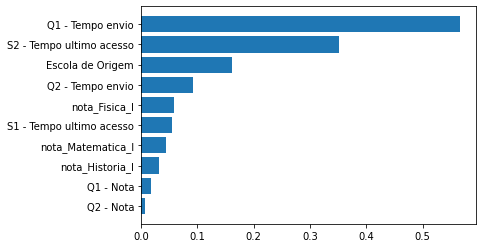

In [38]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

clf_SVC = svm.SVC(kernel='linear',random_state=0) # Linear Kernel
under = RandomUnderSampler(random_state=0)
# fit and apply the transform

treinar_k_fold_resampling(clf_SVC,under,X_train, y_train)

dtc_predictions = clf_SVC.predict(X_test)

exibe_metricas(y_test,dtc_predictions)

features_names = ['Q2 - Tempo envio',
'S1 - Tempo ultimo acesso',
'S2 - Tempo ultimo acesso',
'Q1 - Tempo envio',
'Q2 - Nota',
'Q1 - Nota',
'Escola de Origem',
'nota_Fisica_I',
'nota_Historia_I',
'nota_Matematica_I']

f_importances(abs(clf_SVC.coef_[0]), features_names)

#### Matriz de confusão

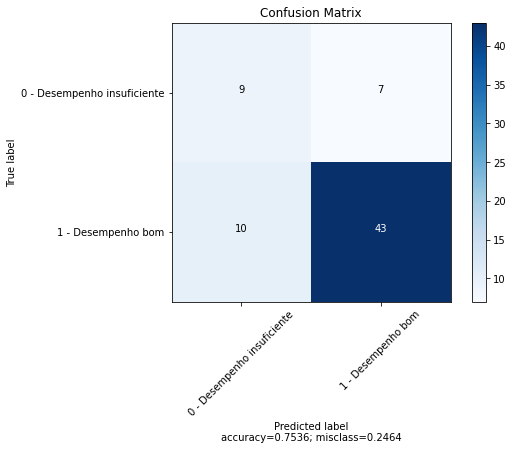

In [39]:
plot_confusion_matrix(cm           = confusion_matrix(y_test,dtc_predictions), 
                      normalize    = False,
                      target_names = ['0 - Desempenho insuficiente', '1 - Desempenho bom'],
                      title        = "Confusion Matrix")

Métricas -  Teste
[[12  4]
 [10 43]]
              precision    recall  f1-score   support

           0       0.55      0.75      0.63        16
           1       0.91      0.81      0.86        53

    accuracy                           0.80        69
   macro avg       0.73      0.78      0.75        69
weighted avg       0.83      0.80      0.81        69

precisão: 0.9148936170212766
recall: 0.75
specificity:  0.75
acurácia: 0.7971014492753623
AUC - ROC: 0.7806603773584906


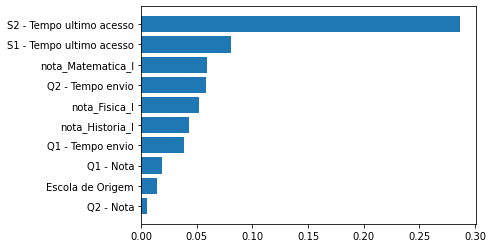

In [40]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

clf_SVC = svm.SVC(kernel='linear',random_state=0) # Linear Kernel
over = RandomOverSampler(random_state=0)
# fit and apply the transform

treinar_k_fold_resampling(clf_SVC,over,X_train, y_train)

dtc_predictions = clf_SVC.predict(X_test)

exibe_metricas(y_test,dtc_predictions)

features_names = ['Q2 - Tempo envio',
'S1 - Tempo ultimo acesso',
'S2 - Tempo ultimo acesso',
'Q1 - Tempo envio',
'Q2 - Nota',
'Q1 - Nota',
'Escola de Origem',
'nota_Fisica_I',
'nota_Historia_I',
'nota_Matematica_I']

f_importances(abs(clf_SVC.coef_[0]), features_names)

#### Matriz de confusão

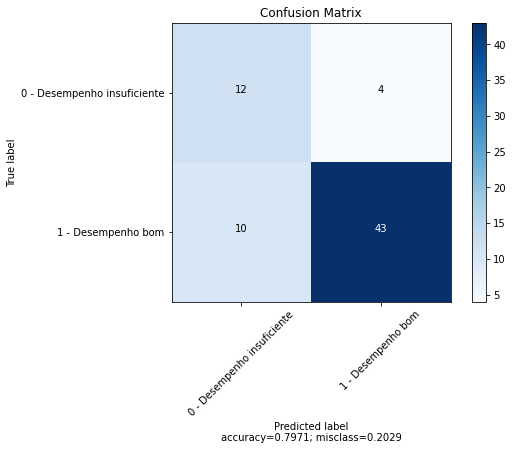

In [41]:
plot_confusion_matrix(cm           = confusion_matrix(y_test,dtc_predictions), 
                      normalize    = False,
                      target_names = ['0 - Desempenho insuficiente', '1 - Desempenho bom'],
                      title        = "Confusion Matrix")

Métricas -  Teste
[[13  3]
 [ 5 48]]
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.94      0.91      0.92        53

    accuracy                           0.88        69
   macro avg       0.83      0.86      0.84        69
weighted avg       0.89      0.88      0.89        69

precisão: 0.9411764705882353
recall: 0.8125
specificity:  0.8125
acurácia: 0.8840579710144928
AUC - ROC: 0.8590801886792453


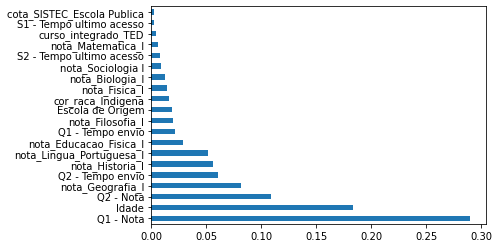

In [42]:
import matplotlib.pyplot as plt

clf_GBM = GradientBoostingClassifier(random_state=0)
over = RandomOverSampler(random_state=0)
# fit and apply the transform

treinar_k_fold_resampling(clf_GBM,over,X_train, y_train)


dtc_predictionsG = clf_GBM.predict(X_test)

exibe_metricas(y_test,dtc_predictionsG)


#plot graph of feature importances for better visualization
feat_importances = pd.Series(clf_GBM.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

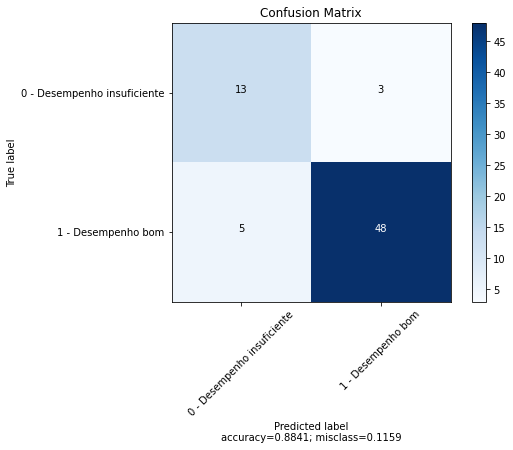

In [43]:
plot_confusion_matrix(cm           = confusion_matrix(y_test,dtc_predictionsG), 
                      normalize    = False,
                      target_names = ['0 - Desempenho insuficiente', '1 - Desempenho bom'],
                      title        = "Confusion Matrix")

### Removendo as features menos importantes - RFECV

gbcCV = GradientBoostingClassifier(random_state=0)

from sklearn.feature_selection import RFECV


gbcCV = XGBClassifier()
rfecv = RFECV(estimator=gbcCV, step=2, cv=StratifiedKFold(10), scoring='recall')
rfecv.fit(x, y)

print('Optimal number of features: {}'.format(rfecv.n_features_))

X = x.copy()

print(np.where(rfecv.support_ == False)[0])

X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

import matplotlib.pyplot as plt

dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()